<a href="https://colab.research.google.com/github/devuvasudvn24/Datascience-assignments/blob/main/Processed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
print(df['LoanAmount'].median())
print(df['Loan_Amount_Term'].median())
print(df['Credit_History'].median())

128.0
360.0
1.0


In [ ]:
numerical_columns = ['LoanAmount','Loan_Amount_Term','Credit_History']

for col in numerical_columns:
  df[col].fillna(df[col].median(),inplace = True)


In [11]:
df.dropna(subset=['Married'],inplace = True)

In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,487
Female,111


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [15]:
df.dropna(subset=['Dependents'],inplace = True)

In [17]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


OUTLIERS DETECTION AND REMOVAL


In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
import matplotlib.pyplot as plt
import seaborn as sn

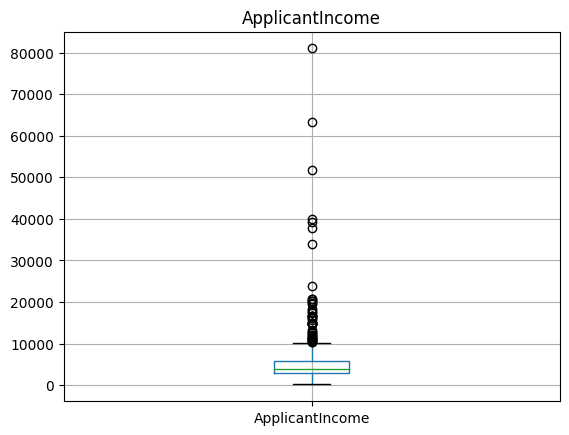

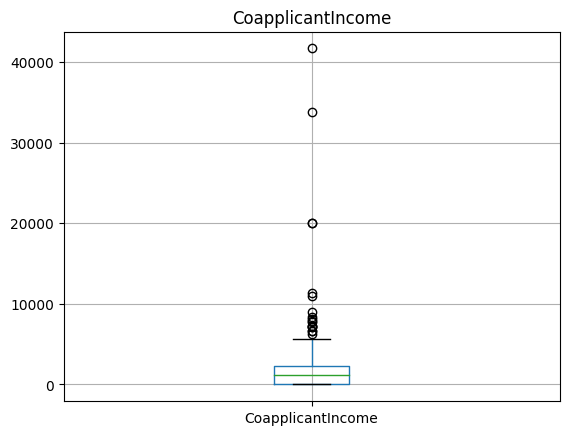

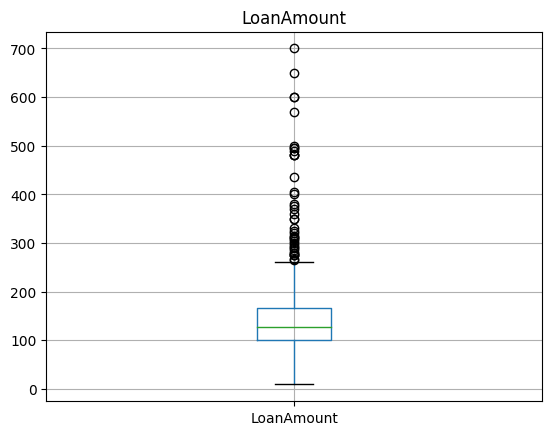

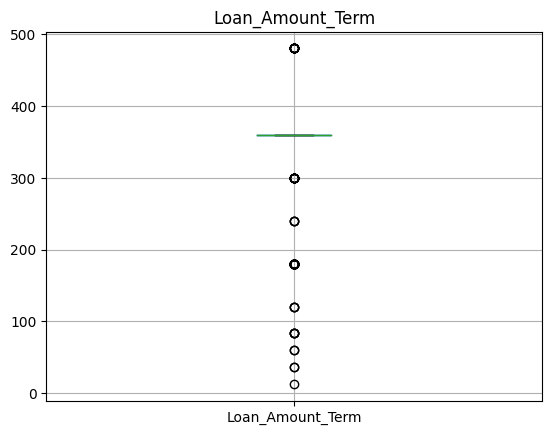

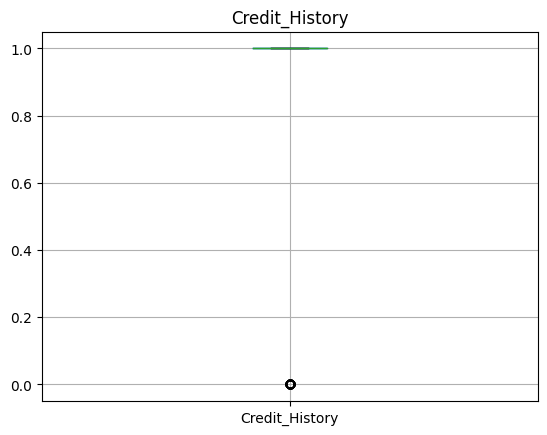

In [21]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot(column)
  plt.title(column)

In [22]:
for column in df.select_dtypes(include=['number']):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)

  iqr=q3-q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df[column]=df[column].clip(lower_bound,upper_bound)

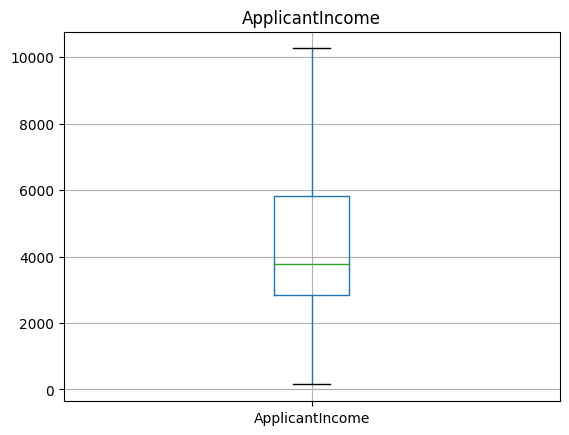

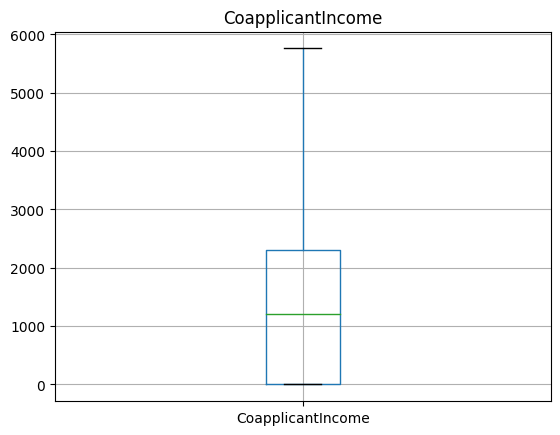

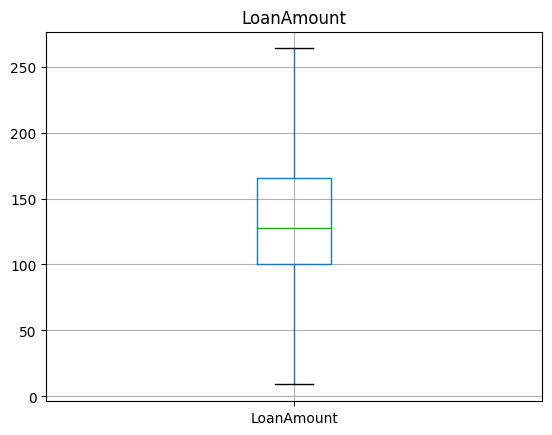

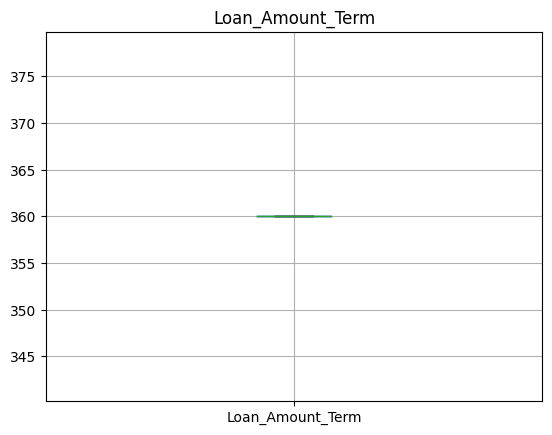

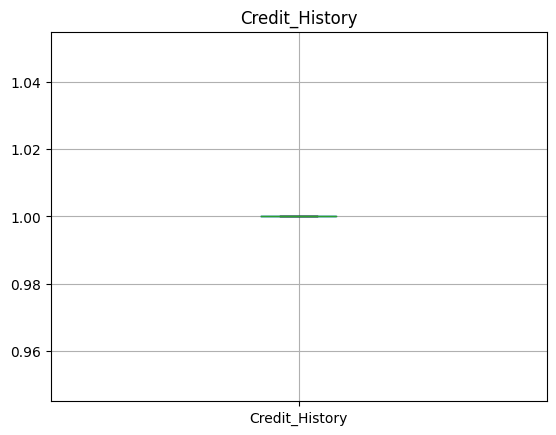

In [23]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot(column)
  plt.title(column)

In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Married'] = le.fit_transform(df['Married'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,1,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,1,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,1,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,1,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,1,1,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1,0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1,0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0,0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,0,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,1,3+,Graduate,0,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,1,1,Graduate,0,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,1,2,Graduate,0,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [29]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
df['Gender'] = le.fit_transform(df['Gender'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,1,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,0,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,0,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,0,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,0,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
from sklearn.preprocessing import OneHotEncoder
OneEn = OneHotEncoder()
encoded_data = OneEn.fit_transform(df[['Property_Area']])
encoded_df = pd.DataFrame(encoded_data.toarray(),columns=OneEn.get_feature_names_out(['Property_Area']))
print(encoded_df)

     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban
0                    0.0                      0.0                  1.0
1                    1.0                      0.0                  0.0
2                    0.0                      0.0                  1.0
3                    0.0                      0.0                  1.0
4                    0.0                      0.0                  1.0
..                   ...                      ...                  ...
594                  1.0                      0.0                  0.0
595                  1.0                      0.0                  0.0
596                  0.0                      0.0                  1.0
597                  0.0                      0.0                  1.0
598                  0.0                      1.0                  0.0

[599 rows x 3 columns]


In [32]:
df=pd.concat([df,encoded_df],axis=1)

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0,Graduate,0.0,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0.0,0.0,1.0
1,LP001003,1.0,1.0,1,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,N,1.0,0.0,0.0
2,LP001005,1.0,1.0,0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,Y,0.0,0.0,1.0
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,0.0,0.0,1.0
4,LP001008,1.0,0.0,0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


In [34]:
df.drop(columns=['Property_Area'],axis=1,inplace=True)

In [35]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0,Graduate,0.0,5849.0,0.0,128.0,360.0,1.0,Y,0.0,0.0,1.0
1,LP001003,1.0,1.0,1,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,N,1.0,0.0,0.0
2,LP001005,1.0,1.0,0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Y,0.0,0.0,1.0
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Y,0.0,0.0,1.0
4,LP001008,1.0,0.0,0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Y,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [38]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0,0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0.0,0.0,1.0
1,1.0,1.0,1,0,0.0,4583.0,1508.0,128.0,360.0,1.0,0,1.0,0.0,0.0
2,1.0,1.0,0,0,1.0,3000.0,0.0,66.0,360.0,1.0,1,0.0,0.0,1.0
3,1.0,1.0,0,1,0.0,2583.0,2358.0,120.0,360.0,1.0,1,0.0,0.0,1.0
4,1.0,0.0,0,0,0.0,6000.0,0.0,141.0,360.0,1.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,1.0,0.0
435,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0
517,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0
571,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0


Scaling process


In [40]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [41]:
scale_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [43]:
for cols in scale_col:
  df[cols]=std.fit_transform(df[[cols]])

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0,0,0.0,0.493266,-0.877142,-0.172442,0.0,1.0,1,0.0,0.0,1.0
1,1.0,1.0,1,0,0.0,-0.013217,0.048613,-0.172442,0.0,1.0,0,1.0,0.0,0.0
2,1.0,1.0,0,0,1.0,-0.646521,-0.877142,-1.269469,0.0,1.0,1,0.0,0.0,1.0
3,1.0,1.0,0,1,0.0,-0.813348,0.570424,-0.313994,0.0,1.0,1,0.0,0.0,1.0
4,1.0,0.0,0,0,0.0,0.553676,-0.877142,0.057579,0.0,1.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,1.0,0.0
435,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0
517,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0
571,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,0.0
